# 3372. Maximize the Number of Target Nodes After Connecting Trees I

There exist two undirected trees with n and m nodes, with distinct labels in ranges [0, n - 1] and [0, m - 1], respectively.

You are given two 2D integer arrays edges1 and edges2 of lengths n - 1 and m - 1, respectively, where edges1[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the first tree and edges2[i] = [ui, vi] indicates that there is an edge between nodes ui and vi in the second tree. You are also given an integer k.

Node u is target to node v if the number of edges on the path from u to v is less than or equal to k. Note that a node is always target to itself.

Return an array of n integers answer, where answer[i] is the maximum possible number of nodes target to node i of the first tree if you have to connect one node from the first tree to another node in the second tree.

Note that queries are independent from each other. That is, for every query you will remove the added edge before proceeding to the next query.

 

Example 1:

Input: edges1 = [[0,1],[0,2],[2,3],[2,4]], edges2 = [[0,1],[0,2],[0,3],[2,7],[1,4],[4,5],[4,6]], k = 2

Output: [9,7,9,8,8]

Explanation:

For i = 0, connect node 0 from the first tree to node 0 from the second tree.
For i = 1, connect node 1 from the first tree to node 0 from the second tree.
For i = 2, connect node 2 from the first tree to node 4 from the second tree.
For i = 3, connect node 3 from the first tree to node 4 from the second tree.
For i = 4, connect node 4 from the first tree to node 4 from the second tree.

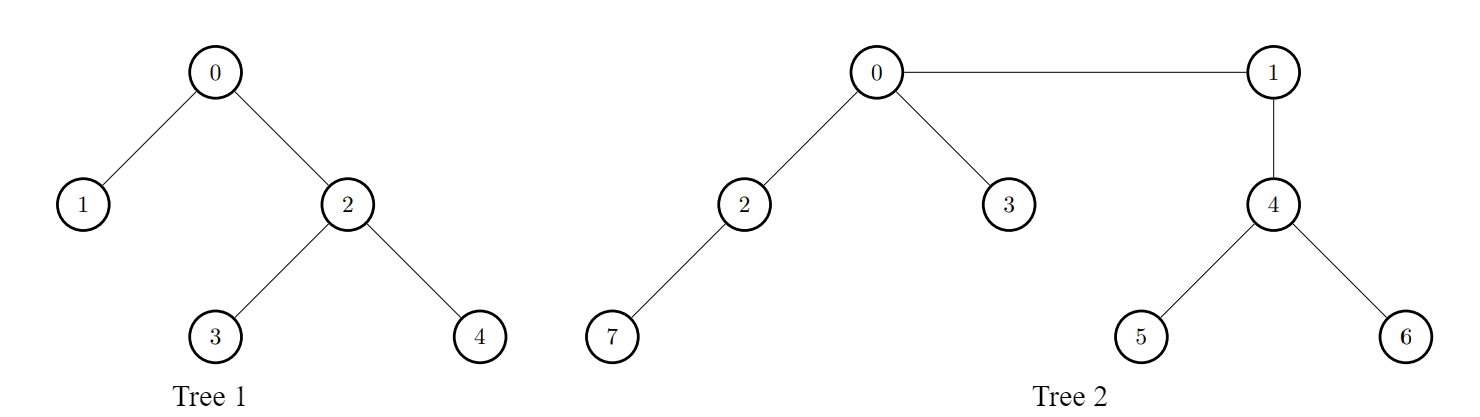

Example 2:

Input: edges1 = [[0,1],[0,2],[0,3],[0,4]], edges2 = [[0,1],[1,2],[2,3]], k = 1

Output: [6,3,3,3,3]

Explanation:

For every i, connect node i of the first tree with any node of the second tree.

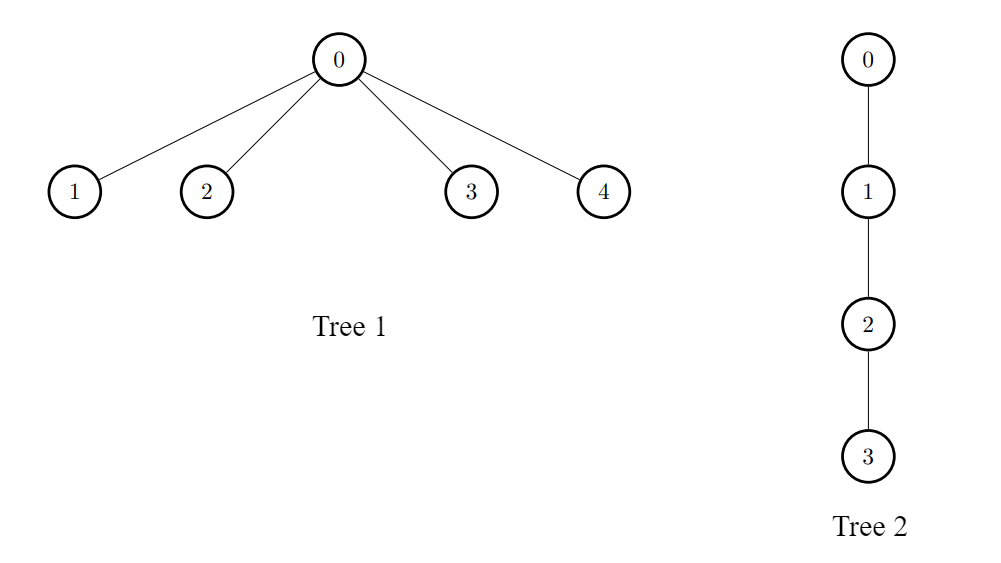
 

Constraints:

2 <= n, m <= 1000
edges1.length == n - 1
edges2.length == m - 1
edges1[i].length == edges2[i].length == 2
edges1[i] = [ai, bi]
0 <= ai, bi < n
edges2[i] = [ui, vi]
0 <= ui, vi < m
The input is generated such that edges1 and edges2 represent valid trees.
0 <= k <= 1000

## Solution: BFS

In [2]:
from collections import defaultdict, deque
import heapq

In [26]:
edges1 = [[0,1],[0,2],[2,3],[2,4]]; edges2 = [[0,1],[0,2],[0,3],[2,7],[1,4],[4,5],[4,6]]; k = 2

# BFS-based function to count number of nodes reachable from each node within distance k
def bfscount(edges, k):
    n = len(edges) + 1  # Total number of nodes = edges + 1 (since it's a tree)
    counts = [0] * n    # Initialize result list to store counts for each node
    adj = defaultdict(list)  # Adjacency list representation of the tree

    # Build the graph
    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)

    # Run BFS from each node
    for start in range(n):
        cnt = 1  # Start node is always counted
        visited = set()
        q = deque()
        q.append((start, 0))
        visited.add(start)

        while q:
            node, dist = q.popleft()
            if dist == k:
                continue  # Don't explore further if we reached distance k
            for nei in adj[node]:
                if nei not in visited:
                    visited.add(nei)
                    q.append((nei, dist + 1))
                    cnt += 1  # Count reachable node

        counts[start] = cnt  # Save count for current start node

    return counts

# Run BFS on both trees with respective distance limits
counts1 = bfscount(edges1, k)       # Counts for tree 1 with distance k
counts2 = bfscount(edges2, k - 1)   # Counts for tree 2 with distance k-1

# Compute the max possible nodes reachable in tree 2 (we can only connect to one node)
max_count = max(counts2)

# For each node in tree 1, total max targets = its own reachable nodes + best case from tree 2
res = [count1 + max_count for count1 in counts1]

# Handle edge case where k == 0: each node can only reach itself
res if k > 0 else [1] * (len(edges1) + 1)

[9, 7, 9, 8, 8]